# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

  - With the advent of technology, societies have become more efficient with their lives. At the same time, however, individual human lives have also become more fast-paced and distracted, leaving little time to explore artistic pursuits. Also, technology has made significant advancements in the ability to coexist with art and general entertainment. It has in fact made it easier for humans with a shortage of time to find and consume good content.

  - Almost every internet-based company's revenue relies on the time consumers spend on its platform. These companies need to be able to figure out what kind of content is needed in order to increase customer time spent and make their experience better. Therefore, one of the key challenges for these companies is figuring out what kind of content their customers are most likely to consume.

  - Spotify is one such audio content provider with a huge market base across the world. With the ever-increasing volume of songs becoming available on the Internet, searching for songs of interest has become a tedious task in itself. However, Spotify has grown significantly in the market because of its ability to recommend the ‘best’ next song to each and every customer based on a huge preference database gathered over time - millions of customers and billions of songs. This is done by using smart recommendation systems that can recommend songs based on users’ likes/dislikes.


### **The objective:**

 - What is the intended goal?
  - Build a recommendation system to propose the top 10 songs for a user based on the likelihood of listening to those songs.


### **The key questions:**

- What are the key questions that need to be answered?

 - How can we effectively analyze user preferences and behavior to understand what kind of songs they are most likely to enjoy?
 - What features and data sources should be considered in the recommendation system to capture users' preferences and improve the quality of recommendations?
 - Are there any additional features or data sources that we can utilize to improve the systems that we build?
 - How can we measure the performance and effectiveness of the recommendation system, and what evaluation metrics should be used to determine its success?


### **The problem formulation**:

- What is it that we are trying to solve using data science?
 - The problem that we are trying to solve using data science is to build a recommendation system for song suggestions on the Spotify platform. The objective is to propose the top 10 songs for each user based on the likelihood of them listening to those songs. This involves understanding and analyzing user behavior, preferences, and historical interactions with songs to generate personalized and relevant song recommendations. By using machine learning and data science techniques, we aim to develop a recommendation model that can effectively predict and suggest songs that users are likely to enjoy, ultimately enhancing the user experience and increasing engagement on the platform.

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import pandas as pd
import numpy as np

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Import mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [3]:
# Importing the datasets
song_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/MIT_Capstone/Million_Songs_Datasets/song_data.csv')
count_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/MIT_Capstone/Million_Songs_Datasets/count_data.csv')

### **Understanding the data by viewing a few observations**

In [4]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [5]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [6]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [7]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:**

- There are 2,000,000 instances in the count_df with 4 attrributes. 2 attributes are numerical and 2 are not numerical.

- There are 1,000,000 instances in the song_df with 5 attrributes. 1 attribute is numerical and 4 are not numerical.

- The 'title' and 'release' attributes in the song_df both contain a small number of missing values.

- Some values in the 'year' column in the song_df dataset have a value of 0 which is in place of missing values.



In [8]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
count_song_merge = pd.merge(count_df, song_df.drop_duplicates(subset = 'song_id', keep = 'first'), on = 'song_id', how = 'left')

# Drop the column 'Unnamed: 0', and name the obtained dataframe as "df"
df = count_song_merge.drop(columns = 'Unnamed: 0')

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [9]:
# Import the LabelEncoder package
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding for "user_id" and "song_id" columns
df['user_id'] = label_encoder.fit_transform(df['user_id'])
df['song_id'] = label_encoder.fit_transform(df['song_id'])

**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [10]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [11]:
# We want our users to have listened to at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [12]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1

In [13]:
# We want our song to be listened by at least 120 users to be considred
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [14]:
# Drop records with play_count more than(>) 5
df_final=df_final[df_final.play_count<=5]

In [15]:
# Check the shape of the data
df_final.shape

(117876, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [16]:
# Display total number of unique user_id
df_final['user_id'].nunique()

3155

Total number of unique song id

In [17]:
# Display total number of unique song_id
df_final['song_id'].nunique()

563

Total number of unique artists

In [18]:
# Display total number of unique artists
df_final['artist_name'].nunique()

232

#### **Observations and Insights:**

- There is a total of 3155 unique users in this dataframe.
- There is a total of 563 unique songs in this dataframe.
- There is a total of 232 unique artists in this dataframe.


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [19]:
# Display the ten songs with the most interactions
df_final.groupby('song_id').size().nlargest(10)

song_id
8582    751
352     748
2220    713
1118    662
4152    652
5531    618
4448    609
6189    606
6293    583
1334    570
dtype: int64

Most interacted users

In [20]:
# Display the ten users with the most interactions
df_final.groupby('user_id').size().nlargest(10)

user_id
61472    243
15733    227
37049    202
9570     184
23337    177
10763    176
9097     175
26616    175
43041    174
65994    171
dtype: int64

#### **Observations and Insights:**

- The song with the most interactions had a total of 751 interactions.
- The song with the tenth most interactions had a total of 570 interactions. This leads us to imply that the distribution of song interactions is right-skewed.

- The user with the most interactions had a total of 243 interactions.
- The user with the tenth most interactions had a total of 171 interactions. This leads us to imply that the distribution of user interactions is also right-skewed.

Songs played in a year

In [21]:
# Find out the number of songs played in a year
df_final.groupby('year').size()

year
0       20649
1969      238
1970      109
1971      133
1973      270
1974      583
1975      173
1976      478
1978      119
1979      220
1980      234
1981      144
1982      126
1983      110
1986     1105
1987      336
1988      569
1990      373
1991     1338
1992      849
1993     1214
1994      504
1995      206
1996      502
1997     1439
1999     1652
2000     4834
2001     2805
2002     5135
2003     7928
2004     2314
2005     5376
2006     7592
2007    13750
2008    14031
2009    16351
2010     4087
dtype: int64

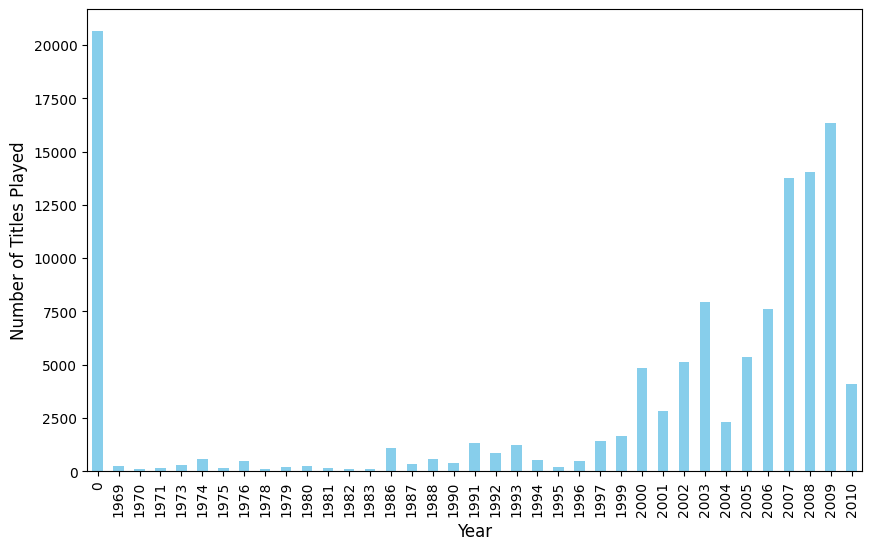

In [22]:
# Create a barplot and boxplot plot with y label as "number of titles played" and x -axis "year"

# Group data and calculate the number of songs per year
songs_per_year = df_final.groupby('year').size()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create plot
songs_per_year.plot(kind='bar', color='skyblue')

# Set the x label of the plot
plt.xlabel('Year', fontsize=12)

# Set the y label of the plot
plt.ylabel('Number of Titles Played', fontsize=12)

# Show the plot
plt.show()

#### **Observations and Insights:**

- The year attribute has many missing values that are categorized with the label 0 as a placeholder value.

- There are two many of these values to drop them without significantly influencing the rest of the data. We do not want to drop the 'year' attribute so our two other two options are to impute the values or leave them in their own placeholder category.

- We will leave these values in the '0' placeholder category so that the recommendation system can treat missing years as a separate category during the recommendation process, allowing it to adapt accordingly.

- Aside from the missing values, the distribution of years in this dataset are left-skewed with many more coming from the 2000's rather than the previous decades.


**Think About It:** What other insights can be drawn using exploratory data analysis?

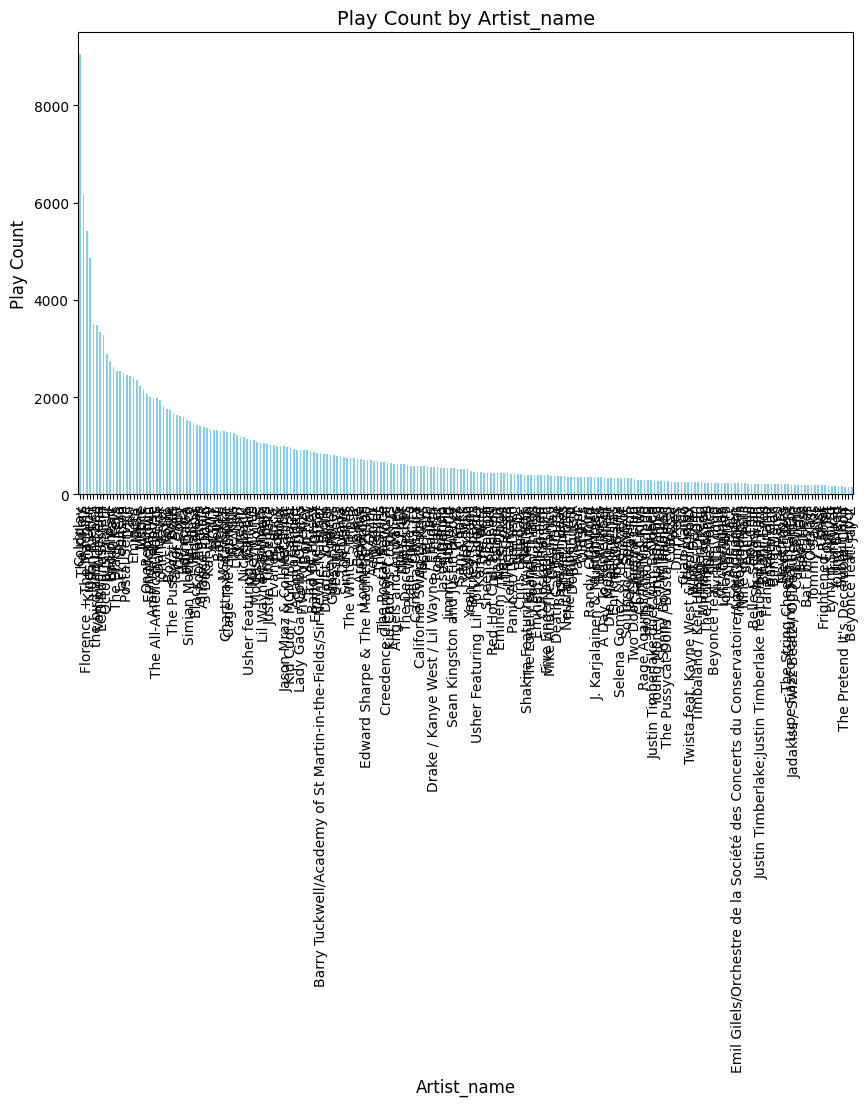

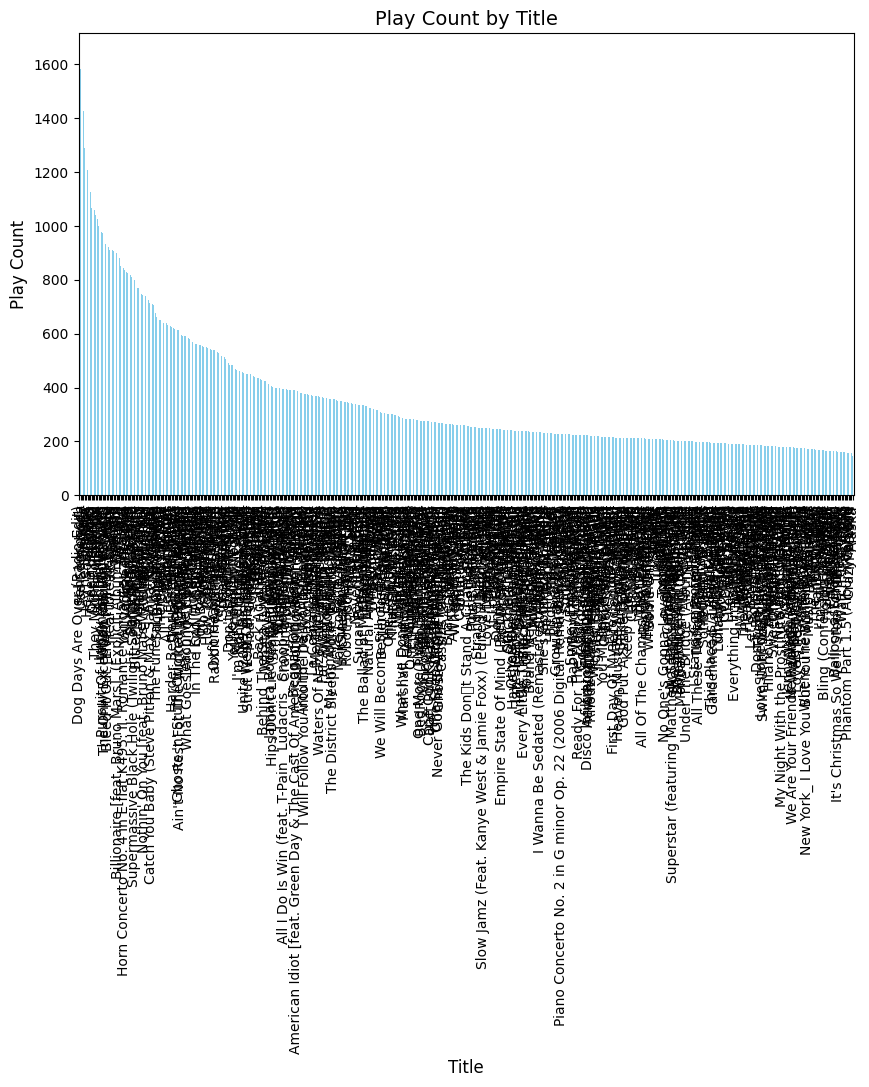

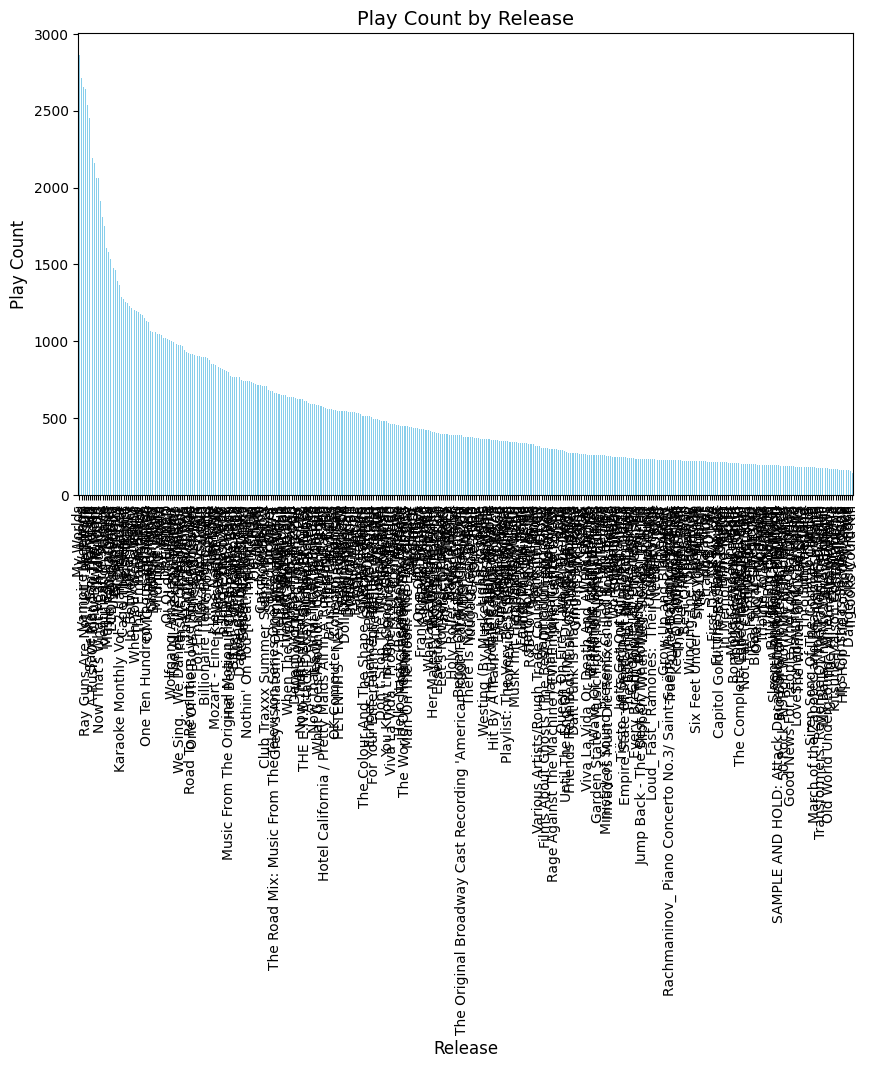

In [23]:
# Create a function to produce barplots for multivariate analysis
def create_barplot_by_attribute(data, attribute):
    plt.figure(figsize=(10, 6))
    data_grouped = data.groupby(attribute)['play_count'].sum()
    data_grouped_sorted = data_grouped.sort_values(ascending=False)
    data_grouped_sorted.plot(kind='bar', color='skyblue')
    plt.xlabel(attribute.capitalize(), fontsize=12)
    plt.ylabel('Play Count', fontsize=12)
    plt.title(f'Play Count by {attribute.capitalize()}', fontsize=14)
    plt.show()

# Call the function for each attribute
attributes = ['artist_name', 'title', 'release']
for attribute in attributes:
    create_barplot_by_attribute(df_final, attribute)

#### **Observations and Insights:**

- There is a small group of artists, albums (release), and titles that have extremely high play counts.

- Sorted by highest play counts to least play counts, artists, albums, and titles each have an exponential decay in play counts.

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117876 entries, 200 to 1999765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      117876 non-null  int64 
 1   song_id      117876 non-null  int64 
 2   play_count   117876 non-null  int64 
 3   title        117876 non-null  object
 4   release      117876 non-null  object
 5   artist_name  117876 non-null  object
 6   year         117876 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 7.2+ MB


In [25]:
# Calculating average play_count
average_count = df_final.groupby('song_id')['play_count'].mean()

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id')['play_count'].count()

# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'average_count': average_count, 'play_freq': play_freq})

# Sort the dataframe by average plays in the descending order
final_play = final_play.sort_values(by = 'average_count', ascending = False)

# Let us see the first five records of the final_play dataset
final_play.head(20)

,average_count,play_freq
song_id,,
7224,3.373832,107
8324,2.625000,96
6450,2.578431,102
9942,2.486667,150
5531,2.309061,618
5653,2.296296,108
8483,2.235772,123
2220,2.220196,713
657,2.218543,151


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [26]:
# Build the function to find top n songs
def best_song_rec(dataset, n_recs, min_interaction = 100):

    # Finding songs with minimum number of interactions
    recommendations = dataset[dataset['play_freq'] > min_interaction]

    # Sorting values with respect to average count
    recommendations = recommendations.sort_values(by = 'average_count', ascending = False)

    return recommendations.index[:n_recs]

In [27]:
# Recommend top 10 songs using the function defined above
list(best_song_rec(final_play, 10, 50))

[7224, 8324, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614]

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [28]:
# Install the surprise package

!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811659 sha256=a55d43c3cc67c981ce1a9b9ab08e791d03637074d8279f13d1adcd4022351178
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [29]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD
from collections import defaultdict

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [30]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

In [31]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale = (0, 5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size = 0.4, random_state = 42)

**Think About It:** How changing the test size would change the results and outputs?

In [32]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user)

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:**

- Calculating RMSE was useful to check how far the overall predicted play counts are from the actual play counts. We have a RMSE of 1.0878.

- Our precision is 0.396, which means that out of all the recommended songs, about 40% of them are relevant to the user.

- With a recall of 0.692, we know that about 69% of the relevent songs are recommended.

- The F_1 score of this baseline model is 0.504, which indicates that the model has moderate capabilities, but has significant room for improvement.

In [33]:
# Find all unique user_id's that played song_id 1671
users_played_song_1671 = df_final.loc[df_final['song_id'] == 1671]['user_id'].unique().tolist()

print("song_id: ", 1671)
print("IDs of users who have played this song:", users_played_song_1671)

song_id:  1671
IDs of users who have played this song: [6958, 45386, 22749, 51415, 74334, 15700, 18349, 33280, 41799, 54866, 23516, 21117, 63702, 27240, 14538, 69334, 44790, 45349, 70987, 53145, 11453, 49747, 6141, 20797, 30305, 55566, 57374, 1035, 52134, 23705, 60129, 58757, 11010, 18409, 28007, 59672, 7670, 20809, 25351, 15644, 21045, 68061, 35160, 55323, 31451, 4848, 23790, 41878, 69900, 53691, 43177, 52662, 72448, 60644, 60518, 40802, 34410, 17434, 56574, 62989, 15634, 71179, 50849, 63669, 71481, 75934, 38654, 61513, 29038, 59307, 42216, 66345, 25298, 9975, 52400, 15984, 25051, 2396, 71060, 1604, 33403, 60008, 39281, 23777, 61358, 48538, 35101, 44726, 23099, 60923, 70967, 23148, 34385, 69297, 69722, 17793, 1602, 37727, 61794, 48175, 29786, 72397, 60215, 45152, 45401, 44865, 10267, 43539, 16915, 72912, 67874, 29527, 64985, 48845, 17932, 48976, 29040, 40358, 16076, 62379, 11799, 10218, 17050, 9193, 19263, 52192, 23856, 45335, 5482, 51599, 53941, 55677, 59782, 63456, 27908, 75144, 494

In [34]:
# Find n unique user_id's that did not play song_id 1671
def n_users_not_listened(n, data, song_id):
    users_listened_to_song = set(data[data['song_id'] == song_id]['user_id'])
    all_users = set(data['user_id'])
    return list(all_users.difference(users_listened_to_song))[:n] # where n is the number of elements to get in the list

In [35]:
# Find 5 unique users that have not played the song_id 1671
n_users_not_listened(5, df_final, 1671)

[8194, 49157, 32773, 8199, 40969]

In [36]:
# Predicting play_count for user with a listened song
sim_user_user.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

In [37]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(8194, 1671, verbose = True)

user: 8194       item: 1671       r_ui = None   est = 1.45   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=8194, iid=1671, r_ui=None, est=1.451611401882498, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**

- The actual play_count of song 1671 by user 6958 was 2, but the model predicted that it was 1.80. This is close but an underprediction.

- For the user (8194) who has not yet played song 1671, the model predicted that they would play it 1.45 times.

Now, let's try to tune the model and see if we can improve the model performance.

In [38]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [20, 30, 40], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [True]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.059617198344869
{'k': 40, 'min_k': 9, 'sim_options': {'name': 'msd', 'user_based': True}}


In [39]:
# Train the best model found in above gridsearch
sim_options = {'name': 'msd',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options,
                                   k = 40,
                                   min_k = 9,
                                   random_state = 1,
                                   verbose = False)

# Training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0620
Precision:  0.414
Recall:  0.611
F_1 score:  0.494


**Observations and Insights:**

- The optimized similarity user-user model produced a RMSE of 1.0620. This is slightly better than the base model.

- Our optimized model landed with a precision of 0.414, which means that out of all the recommended songs, about 41% of them are relevant to the user. This is slightly better than the base model.

- The optimized model has a worse recall of 0.611, meaning that about 61% of the relevent songs are recommended.

- The F_1 score of this optimized model is 0.494 - a small step down in model performance compared to the base model.

In [40]:
# Predict the play count with the optimized model for a user who has listened to the song.
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.52   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.5210405508798759, details={'actual_k': 40, 'was_impossible': False})

In [41]:
# Find n unique song_id's that were not played by user_id 6958
def n_songs_not_listened(n, data, user_id):
    songs_listened_to_by_user = set(data[data['user_id'] == user_id]['song_id'])
    all_songs = set(data['song_id'])
    return list(all_songs.difference(songs_listened_to_by_user))[:n] # where n is the number of elements to get in the list

n_songs_not_listened(5, df_final, 6958)

[2048, 6148, 21, 22, 6175]

In [42]:
# Predict the play count with the optimized model for a song that is not listened to by the user (with user_id 6958)
sim_user_user.predict(6958, 2048, verbose = True)

user: 6958       item: 2048       r_ui = None   est = 1.77   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=2048, r_ui=None, est=1.775, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**

- The optimized model estimated the amount of times user 6958 played song 1671 to be 1.52 - an underprediction and a worse prediction than the base model.

- The optimized model estimated a play count of 1.77 on the song that user 6958 has not listen to before.

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [43]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, k=5)

[31, 82, 90, 116, 125]

In [44]:
sim_user_user.get_neighbors(0, k=5)

[3, 6, 11, 16, 28]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [45]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended song ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interaction_matrix = data.pivot(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those song ids which the user_id has not listened yet
    non_interacted_songs = user_item_interaction_matrix.loc[user_id][user_item_interaction_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song ids which user_id has not interacted yet
    for song_id in non_interacted_songs:

        # Predicting the play_counts for those non listened song ids by this user
        est = algo.predict(user_id, song_id).est

        # Appending the predicted play_counts
        recommendations.append((song_id, est))
    # Sorting the predicted play_counts in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n]# Returing top n highest predicted played songs for this user

In [46]:
# Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine
user_user_recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)

In [47]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(user_user_recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,7224,2.935235
1,6450,2.668720
2,8324,2.467205
3,6448,2.386082
4,4831,2.348859


**Observations and Insights:**

- The model predicted five top recommended songs for user 6958 with the corresponding predicted play counts of each.

- The song with the highest predicted play count was song 7224 with a predicted play count of 2.935235.

### Correcting the play_counts and Ranking the above songs

In [48]:
def ranking_songs(recommendations, final_play):
  # Sort the songs based on play counts
  ranked_songs = final_play.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending=False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count']), on='song_id', how='inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending=False)

  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [49]:
# Applying the ranking_songs function on the final_play data
ranking_songs(user_user_recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
1,7224,107,2.935235,2.838562
2,6450,102,2.668720,2.569705
4,8324,96,2.467205,2.365143
0,6448,109,2.386082,2.290300
3,4831,97,2.348859,2.247324


**Observations and Insights:**

- The less that a song is played, the more its predicted play_count is corrected to a lower number.

### Item Item Similarity-based collaborative filtering recommendation systems

In [50]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_item_item = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_item_item)

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights:**

- The item-item base similarity CF algorithm has the smallest and best RMSE so far at 1.0394.

- It has the worst precision, recall, and F_1 score so far at 0.307, 0.562, and 0.397 respectively.


In [51]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [52]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(8194, 1671, verbose = True)

user: 8194       item: 1671       r_ui = None   est = 1.65   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=8194, iid=1671, r_ui=None, est=1.6455179645415152, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**

- The item-item base similarity CF algorithm predicted that user 6958 would listen to song 1671 1.36 times, and the actual number of times that user listened to song 1671 was 2. This is the worst prediction we have seen for this user-item pair.

- The item-item base similarity CF algorithm predicted that user 8194 would listen to the same song 1.65 times.

In [53]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [20, 30, 40], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.03236012499954
{'k': 40, 'min_k': 6, 'sim_options': {'name': 'cosine', 'user_based': False}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [54]:
# Apply the best model found in the grid search
sim_options = {'name': 'cosine',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options,
                                   k = 40,
                                   min_k = 6,
                                   random_state = 1,
                                   verbose = False)

# Training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0391
Precision:  0.32
Recall:  0.588
F_1 score:  0.414


**Observations and Insights:**

- The item-item optimized similarity CF algorithm has the smallest and best RMSE so far at 1.0391 - just below that of the base model.

- The precision is higher than the base model at 0.32, but it is still much lower than the user-user models.

- The recall is also higher than the base model at 0.588, but also still lower than both user-user models.

- The F_1 score is also lower than both user-user models, but higher than the item-item base model at 0.414.

In [55]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [56]:
# Predicting play count for a sample user_id 6958 with song_id 2048 which is not heard by the user
sim_item_item_optimized.predict(6958, 2048, verbose = True)

user: 6958       item: 2048       r_ui = None   est = 1.38   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=2048, r_ui=None, est=1.3800099066049123, details={'actual_k': 20, 'was_impossible': False})

**Observations and Insights:**

- The item-item optimized similarity CF algorithm predicted that user 6958 would listen to song 1671 1.36 times again, and the actual number of times that user listened to song 1671 was 2. This is the same prediction we previously saw for this user-item pair.

- The item-item base similarity CF algorithm predicted that the same user (6958) would listen to song 2048 1.38 times.

In [57]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, 5)

[3, 10, 11, 24, 30]

In [58]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
item_item_recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [59]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(item_item_recommendations, columns=['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,2842,1.650010
1,7921,1.542349
2,1767,1.540675
3,4631,1.539257
4,5417,1.538866


In [60]:
# Applying the ranking_songs function
ranking_songs(item_item_recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
0,2842,232,1.650010,1.584357
1,7921,220,1.542349,1.474929
2,5417,135,1.538866,1.452800
3,4631,120,1.539257,1.447970
4,1767,112,1.540675,1.446184


**Observations and Insights:**

- The less that a song is played, the more its predicted play_count is corrected to a lower number.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [61]:
# Build baseline model using svd
svd = SVD(random_state = 1)

# Training the algorithm on the trainset
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [62]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [63]:
# Making a prediction for the user who has not listened to the song (song_id 1671)
svd.predict(8194, 1671, verbose = True)

user: 8194       item: 1671       r_ui = None   est = 1.42   {'was_impossible': False}


Prediction(uid=8194, iid=1671, r_ui=None, est=1.4213371501259067, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [64]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30],
              'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Perform 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0124271110628318
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [65]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs = 30,
                    lr_all = 0.01,
                    reg_all = 0.2,
                    random_state = 1)

# Train the algorithm on the trainset
svd_optimized = svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


**Observations and Insights:**

- This optimized SVD model has the best rmse yet, beating its base model with a rmse of 1.0141.

- This model has the best precision yet with 0.415 - slightly beating its base model and our optimized user-user model. This means that out of all the recommended songs, about 42% of them are relevant to the user.

- The recall of this model is 0.635 meaning that about 64% of the relevent songs are recommended. This i sthe second best recall among the models we have evaluated coming slightly ahead of its base model, but below the user-user base model.

- The F_1 score of this model is neck to neck with the user-user base model for the highest score landing at 0.502 - just below the user-user model's 0.504.

In [66]:
# Using svd_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125098, details={'was_impossible': False})

In [67]:
# Using svd_optimized model to recommend for userId 6958 and song_id 2048 with unknown baseline rating
svd_optimized.predict(6958, 2048, verbose = True)

user: 6958       item: 2048       r_ui = None   est = 1.41   {'was_impossible': False}


Prediction(uid=6958, iid=2048, r_ui=None, est=1.4131233841668376, details={'was_impossible': False})

**Observations and Insights:**

- The model based CF matrix factorization optimized algorithm predicted that user 6958 would listen to song 1671 1.34 times, and the actual number of times that user listened to song 1671 was 2.

- The model based CF matrix factorization optimized algorithm predicted that the same user (6958) would listen to song 2048 1.41 times.

In [68]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [69]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
2,7224,107,2.601899,2.505225
1,5653,108,2.108728,2.012502
4,8324,96,2.014091,1.912029
0,9942,150,1.940115,1.858465
3,6450,102,1.952493,1.853478


**Observations and Insights:**

- As we said earlier, the less that a song is played, the more its predicted play_count is corrected to a lower number.

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [70]:
# Make baseline clustering model
# Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [71]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [72]:
# Making prediction for user (userid 6958) for a song(song_id 2048) not heard by the user
clust_baseline.predict(6958, 2048, verbose = True)

user: 6958       item: 2048       r_ui = None   est = 1.47   {'was_impossible': False}


Prediction(uid=6958, iid=2048, r_ui=None, est=1.4664938245182446, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [73]:
# Set the parameter space to tune
param_grid = {
    'n_cltr_u': [3, 4, 5, 6],
    'n_cltr_i': [3, 4, 5, 6],
    'n_epochs': [30, 40, 50]
}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0458724174051075
{'n_cltr_u': 3, 'n_cltr_i': 3, 'n_epochs': 50}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [74]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 3,
                           n_cltr_i = 3,
                           n_epochs = 40,
                           random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


**Observations and Insights:**
- All scores are identical to that of the baseline cluster based model.

- The model performed with mediocre scores compared to the other models, with each score not being the best or the worst.

In [75]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [76]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 2048 with unknown baseline rating
clust_tuned.predict(6958, 2048, verbose = True)

user: 6958       item: 2048       r_ui = None   est = 1.47   {'was_impossible': False}


Prediction(uid=6958, iid=2048, r_ui=None, est=1.4664938245182446, details={'was_impossible': False})

**Observations and Insights:**

- The cluster based optimized algorithm predicted that user 6958 would listen to song 1671 1.29 times, and the actual number of times that user listened to song 1671 was 2.

- The cluster based optimized algorithm predicted that the same user (6958) would listen to song 2048 1.47 times.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [77]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)

### Correcting the play_count and Ranking the above songs

In [78]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
2,7224,107,3.094797,2.998124
4,8324,96,2.311498,2.209436
1,9942,150,2.215039,2.133390
0,5531,618,2.124563,2.084337
3,4831,97,2.123783,2.022248


**Observations and Insights:**

- Again, the less that a song is played, the more its predicted play_count is corrected to a lower number.

- In most recommendation engines we have used on user 6958, there are multiple common songs that pop up - especially song 7224 which is usually the highest recommended song.

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [79]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_final['text'] = df_final['title'] + ' ' + df_final['release'] + ' ' + df_final['artist_name']

df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [80]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_final data
df_final_cb = df_final[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_final_cb = df_final_cb.drop_duplicates(subset = ['title'])

# Set the title column as the index
df_final_cb = df_final_cb.set_index('title')

# See the first 5 records of the df_final_cb dataset
df_final_cb.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [81]:
# Create the series of indices from the data
indices = pd.Series(df_final_cb.index)

# Check the shape of the data
df_final_cb.shape

(561, 4)

In [82]:
# Importing necessary packages to work with text data (natural language toolkit library)
import nltk
nltk.download('omw-1.4')

# Download punkt library (punctuations)
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [83]:
# Create a function to tokenize the text
def tokenize(text):

    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [84]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_info_tfidf = tfidf.fit_transform(df_final_cb['text'].values).toarray()

In [85]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_info_tfidf, song_info_tfidf)

# Let us see the above array
similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [86]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_final_cb.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [87]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

**Observations and Insights:**

- This produced a list of ten songs that have similar properties in their content as recommended by the model.

- Multiple of these songs come from the same or similar artists.

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

  - We built recommendation systems using six different algorithms in order to achieve the goal of extracting meaningful insights from the data and building a recommendation system that helps in recommending songs to platform users. They are as follows:

   - Rank-based using averages
   - User-user similarity-based collaborative filtering
   - Item-item similarity-based collaborative filtering
   - Model-based (matrix factorization) collaborative filtering
   - Cluster-based
   - Content-based using TF-IDF feature extraction

  - For these all of these algorithms except Rank-based and Content-based, grid search cross-validation is used to find the optimal hyperparameters for the data, and improve the performance of the model. Optimized models were built using these yeilded parameters.

  - For performance evaluation of those same models, precision@k and recall@k are used. Using these two metrics, the F_1 score is calculated for each working model.

  - Overall, the baseline user-user similarity-based recommendation system has given the best performance in terms of the F1-Score (0.504). This followed by the optimized model-based recommendation system which had a F1-Score of (0.502).

  - Collaborative Filtering searches for neighbors based on similarity of song preferences and recommends songs that those neighbors listen to while Matrix factorization works by decomposing the user-item interaction matrix into the product of two lower dimensionality rectangular matrices.

  - Matrix Factorization assumes that both songs and users are present in some low dimensional space describing their properties, therefore having the lowest RMSE (1.0141), and recommends a song based on its proximity to the user in the latent space. This also implies that it accounts for latent factors.

  - The two other models user were rank-based and content-based. The rank-based model simply ranked songs by popularity based on the highest average play_count to the lowest. The content-based model was much more complex and utilized the TF_IDF feature extraction method to compare similar content based on the strings contained in the title, album name, and artist name of each song. Both of these yeilded similar results to most of the other models, but they do not use the same performance metrics.

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

 - The use of different algorithms provides diverse insights into the data, helping to explore different aspects of song recommendations and their performance.

 - Different models have different complexities and strengths. While collaborative filtering and matrix factorization can handle user preferences and latent factors well, the rank-based and content-based models offer simplicity and interpretability.

 - We'll lean towards RMSE and Precision as the most influential performance metrics because we care more about having the recommended songs be more likely to be relevant to the user than sacrifice the quality of our recommendations in order to have a higher recall (having more relevant songs get recommended).

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

 - The recommended course of action is to apply the Matrix Factorization optimized model that we created. It has the best metrics for rmse and precision and is a close second best for F1-Score. It's complexity will come as a subtle pleasantry for users because it will be caple of finding more than just the most popular songs or obvious recommendations that might come from the rank-based and content-based models.

 - We recommend deploying this model as soon as possible since it has displayed quality, and we want to begin upgrading our users' experiences earlier rather than waiting. Then we will take steps for improvements or stronger replacements.

 - Simple options to improve this model or find an even stronger model include trying to improve the performance of these models using hyperparameter tuning.

 - There are multiple options to improve or replace the initial model that we recommended to deploy:
   - We can build a more complex hybrid recommendation system - based on threcommendation systems that we built and analyzed in this notebook, we would lean toward reating a hybrid recommendation system with the model-based and the content-based recommendation systems that we built.
   - Another improvement to consider is researching the users of the platform along with any negative biases, negative stereotypes, or negative information/content bubbles, and build algorithmic filtering solutions to break those negative patterns. With the power of how influential these recommendation systems are likely to be on our users and their experience, we also hold responsibility to strive towards building solutions to problems that models like ours that are built on past data hold.
   - An example of a tailored solution like this would be to add song lyric data to our content-based model, perform sentiment analysis on that data, and then tailor the model to avoid producing content recommendation bubbles that overwhelm users with songs that are significantly more likely to contribute to high levels of anxiety or depression.